Step 1: EDA

Empty DataFrame
Columns: [Null Count, Null Percentage]
Index: []
There are no null values in the dataset.


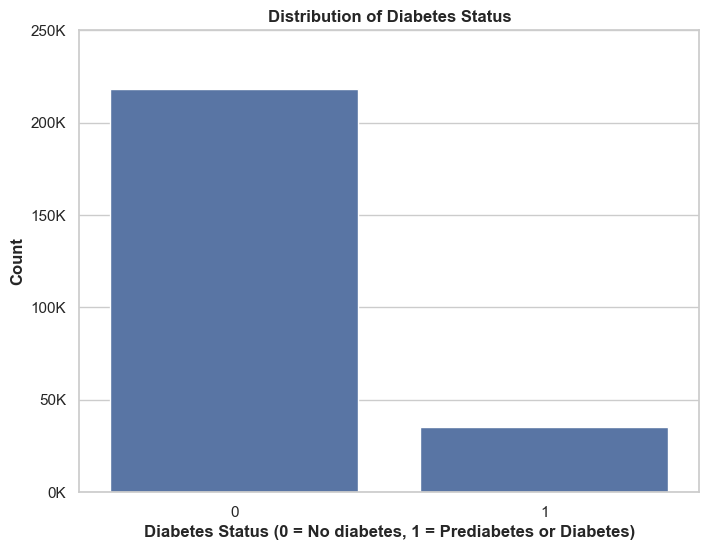

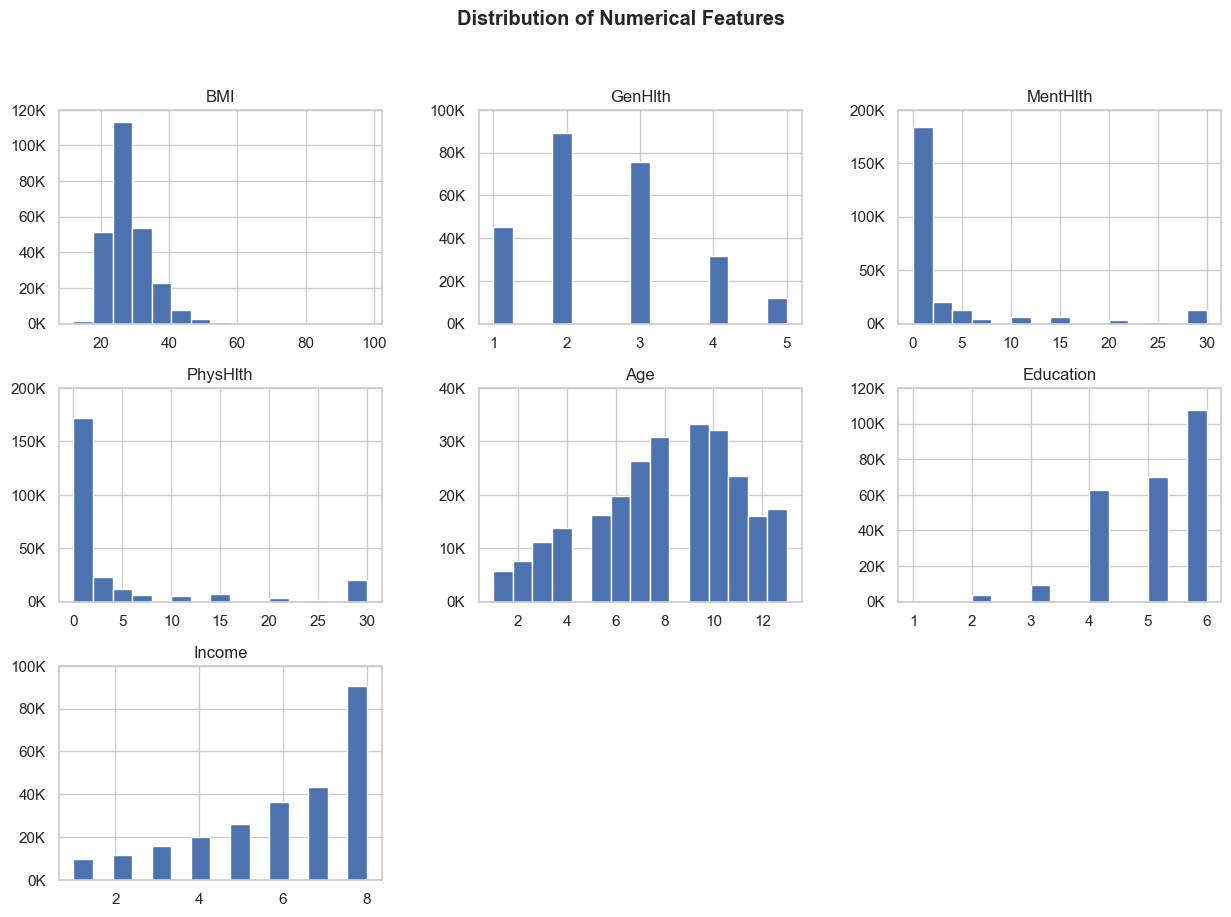

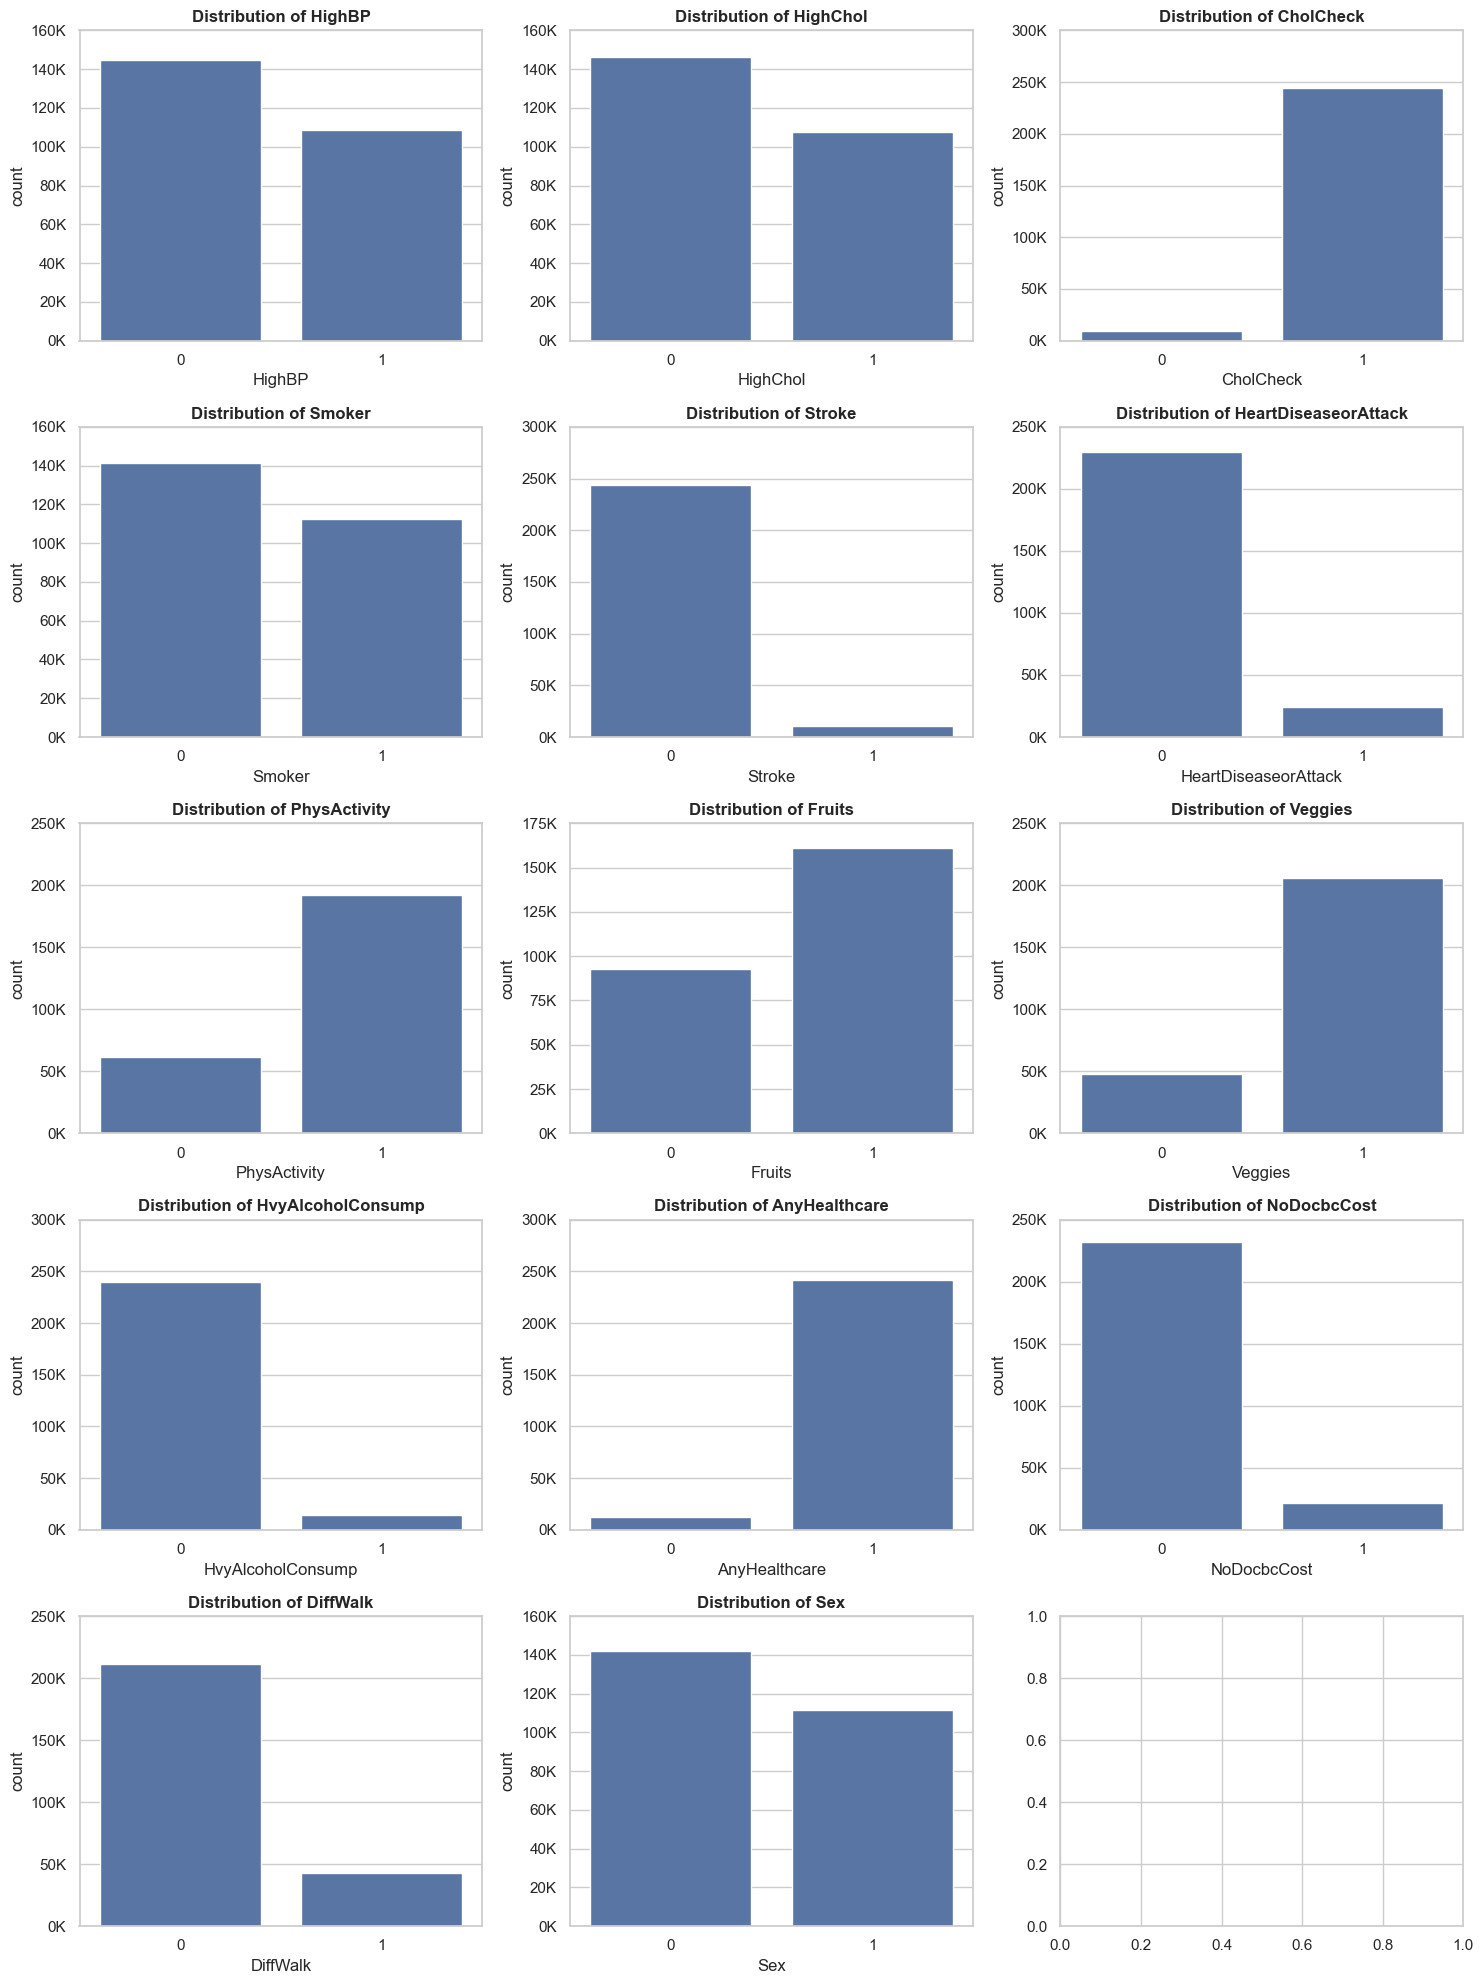

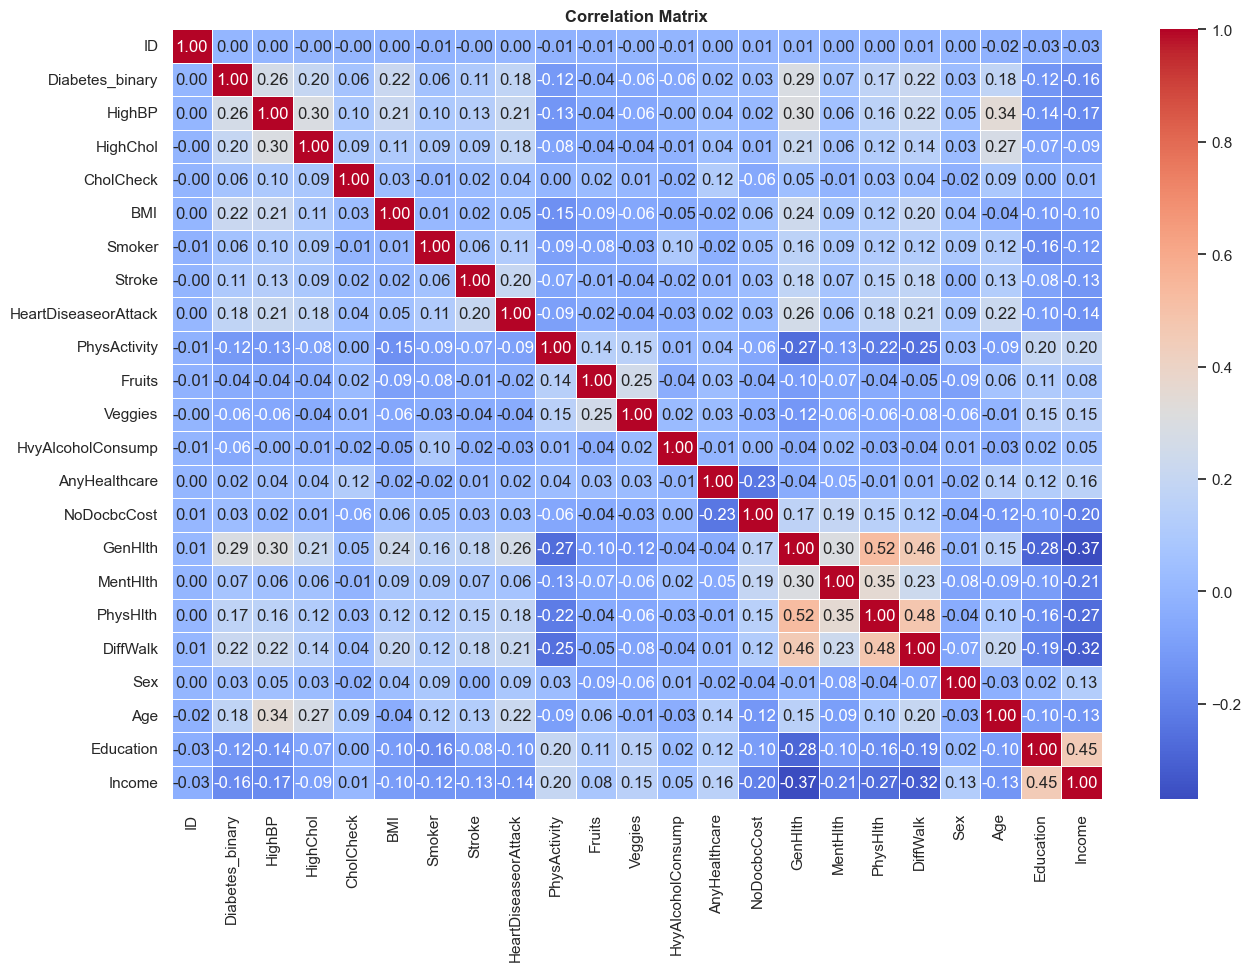

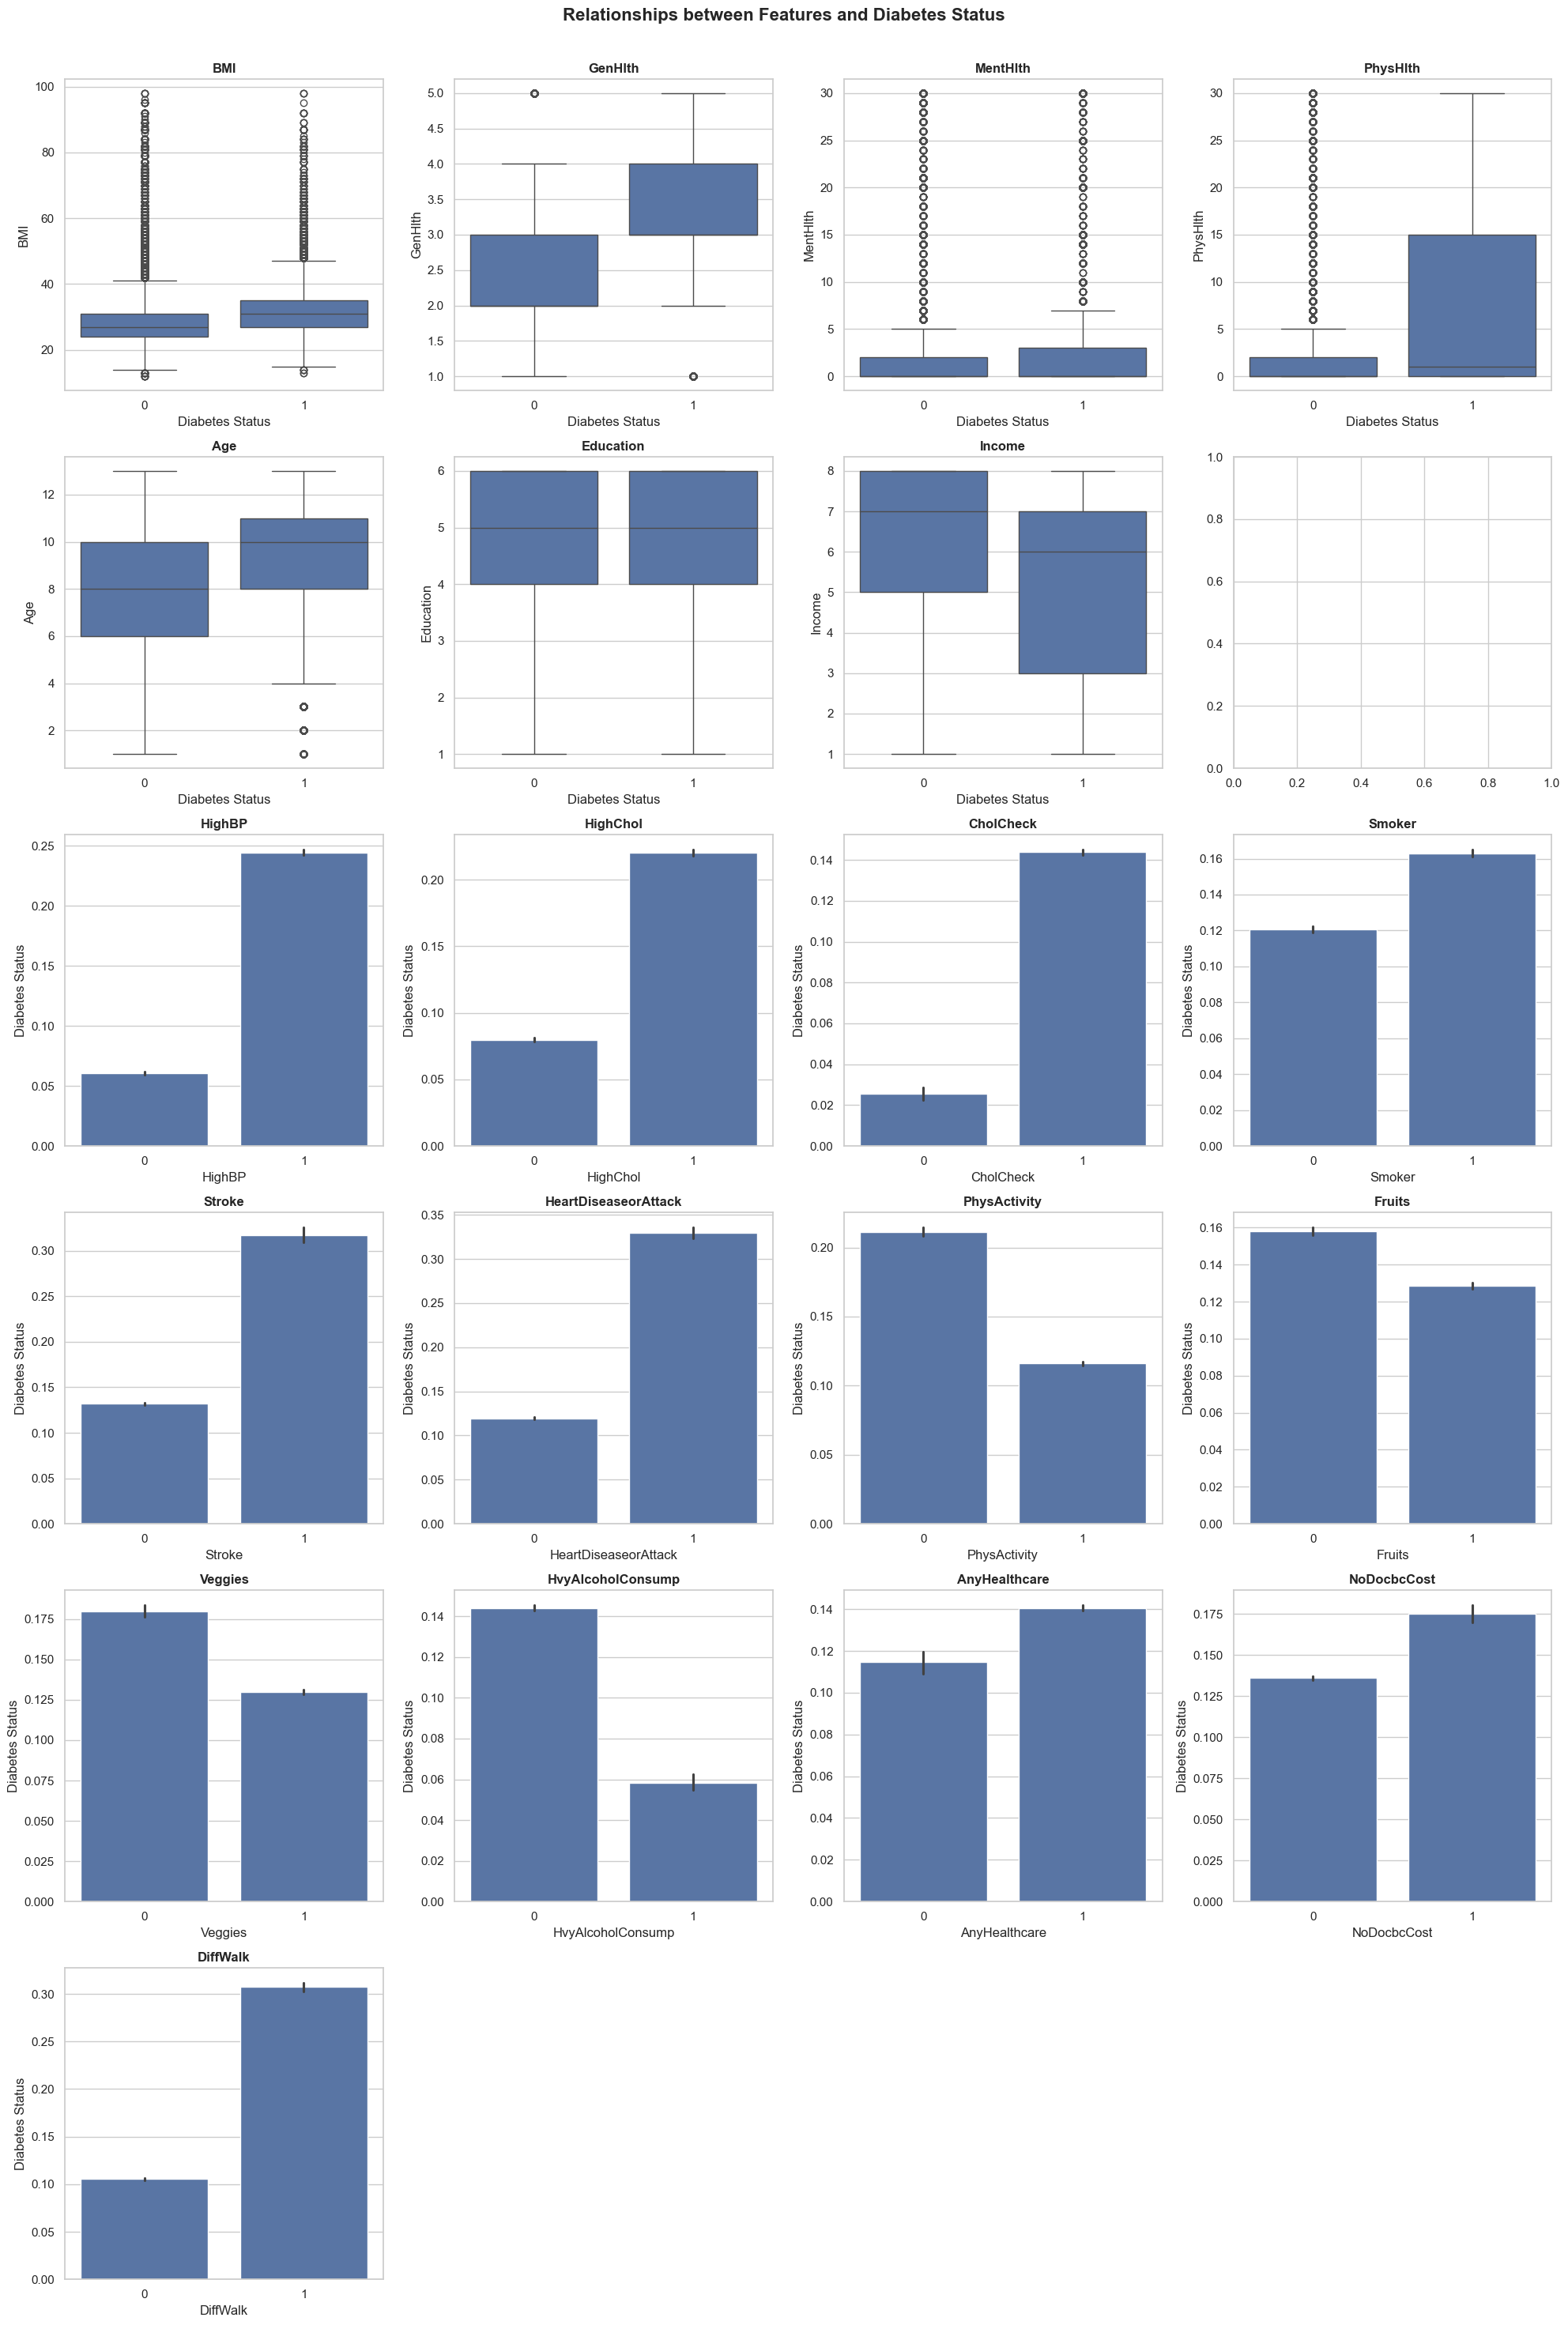

                 Feature          Chi2        p-value
0                GenHlth  22728.069055   0.000000e+00
1                 HighBP  17562.446090   0.000000e+00
2               DiffWalk  12092.319741   0.000000e+00
3               HighChol  10174.074889   0.000000e+00
4                    Age   8795.050614   0.000000e+00
5               PhysHlth   8078.527635   0.000000e+00
6   HeartDiseaseorAttack   7971.155841   0.000000e+00
7                 Income   7003.715091   0.000000e+00
8              Education   4027.112282   0.000000e+00
9           PhysActivity   3539.419370   0.000000e+00
10                Stroke   2838.916547   0.000000e+00
11              MentHlth   1452.095440  6.353743e-287
12             CholCheck   1062.938144  3.751399e-233
13                Smoker    937.055759  8.640172e-206
14     HvyAlcoholConsump    825.118756  1.865932e-181
15               Veggies    811.805975  1.463029e-178
16                Fruits    421.611539   1.088121e-93
17                   Sex    

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Read the data file
df = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Full%20Dataset%20(RAW).csv")

# Check for null values
null_counts = df.isnull().sum()
null_percentages = 100 * df.isnull().sum() / len(df)

# Combine the counts and percentages into a single dataframe
null_table = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])

# Sort the table by null count in descending order
null_table = null_table.sort_values('Null Count', ascending=False)

# Display only columns with null values
print(null_table[null_table['Null Count'] > 0])

# If there are no null values, print a message
if null_table['Null Count'].sum() == 0:
    print("There are no null values in the dataset.")

# Set plot style
sns.set_theme(style="whitegrid")

# Function to format y-axis labels with "K" for thousands
def format_yaxis(ax):
    ylabels = ax.get_yticks()
    ax.set_yticks(ylabels)
    ax.set_yticklabels([f'{int(y/1000)}K' for y in ylabels])

# 1. Distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes_binary', data=df)
format_yaxis(ax)
plt.title('Distribution of Diabetes Status', fontweight='bold')
plt.xlabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# 2. Distribution of numerical features
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features', fontweight='bold')
for ax in plt.gcf().axes:
    format_yaxis(ax)
plt.show()

# 3. Distribution of binary features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
for i, feature in enumerate(binary_features):
    row, col = divmod(i, 3)
    ax = sns.countplot(x=feature, data=df, ax=axes[row, col])
    format_yaxis(ax)
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

# 5. Relationships between features and the target variable
# Calculate the number of rows and columns for the subplot grid
n_numerical = len(numerical_features)
n_binary = len(binary_features)
n_cols = 4
n_rows = -(-n_numerical // n_cols) + -(-n_binary // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Relationships between Features and Diabetes Status', fontsize=16, fontweight='bold')

# Plot relationships for numerical features
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, n_cols)
    sns.boxplot(x='Diabetes_binary', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}', fontweight='bold')
    axes[row, col].set_xlabel('Diabetes Status')
    axes[row, col].set_ylabel(feature)

# Plot relationships for binary features
start_row = -(-n_numerical // n_cols)  # Ceiling division
for i, feature in enumerate(binary_features):
    row, col = divmod(i, n_cols)
    row += start_row
    sns.barplot(x=feature, y='Diabetes_binary', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Diabetes Status')

# Remove any unused subplots
for i in range(n_numerical + n_binary, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to make room for the suptitle
plt.show()

# List of categorical columns to test
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 
                       'Education', 'Income']

# Target variable
target = 'Diabetes_binary'

# Perform Chi-Square test
chi2_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p-value': p}

# Convert results to DataFrame
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index').reset_index()
chi2_results_df.columns = ['Feature', 'Chi2', 'p-value']

# Sort results by Chi2 score in descending order, then by p-value
chi2_results_df.sort_values(by=['Chi2', 'p-value'], ascending=[False, True], inplace=True)
chi2_results_df.reset_index(drop=True, inplace=True)

# Display the results
print(chi2_results_df)

Step 2: Feature Engineering + Clustering

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Read the data file
df = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Full%20Dataset%20(RAW).csv")

# Drop the ID column
df.drop(columns=['ID'], inplace=True)

# Reversing some Binary Columns (Changing column names and reversing values for specific columns)
columns_to_reverse = {
    'DiffWalk': 'NoDiffWalk',
    'HighBP': 'NoHighBP',
    'HighChol': 'NoHighChol',
    'HeartDiseaseorAttack': 'NoHeartDiseaseorAttack',
    'Stroke': 'NoStroke',
    'Smoker': 'NoSmoker',
    'HvyAlcoholConsump': 'NoHvyAlcoholConsump'
}

for old_col, new_col in columns_to_reverse.items():
    df[new_col] = 1 - df[old_col]
    df.drop(columns=[old_col], inplace=True)

# Clustering adjustments

# GenHlth scaling
gen_hlth_scale = {1: 1, 2: 0.75, 3: 0.5, 4: 0.25, 5: 0}
df['GenHlth'] = df['GenHlth'].map(gen_hlth_scale)

# Adding the NotObese column
df['NotObese'] = df['BMI'].apply(lambda x: 1 if x < 35 else 0)

# Income scaling
income_scale = {1: 0, 2: 0, 3: 0.25, 4: 0.25, 5: 0.5, 6: 0.75, 7: 0.75, 8: 1}
df['Income'] = df['Income'].map(income_scale)

# Education scaling
education_scale = {1: 0, 2: 0, 3: 0.25, 4: 0.75, 5: 1, 6: 1}
df['Education'] = df['Education'].map(education_scale)

# Age scaling
age_scale = {1: 1, 2: 1, 3: 1, 4: 0.75, 5: 0.75, 6: 0.75, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.25, 11: 0.25, 12: 0.25, 13: 0}
df['Age'] = df['Age'].map(age_scale)

# Feature Engineered Columns
df['PhysicalCondition'] = (df['GenHlth'] + df['NoDiffWalk'] + df['PhysHlth'] + df['PhysActivity']) / 4
df['NoDisease'] = (df['NoHighBP'] + df['NoHighChol'] + df['NoHeartDiseaseorAttack'] + df['NoStroke']) / 4
df['Lifestyle'] = (df['NoSmoker'] + df['NoHvyAlcoholConsump'] + df['Veggies'] + df['Fruits']) / 4

# Create the final dataset
FinalDataset = df.copy()

# Perform chi-squared test for each categorical feature against Diabetes_binary
chi_squared_results = {}

for column in FinalDataset.columns:
    if column != 'Diabetes_binary' and FinalDataset[column].nunique() <= 10:
        contingency_table = pd.crosstab(FinalDataset[column], FinalDataset['Diabetes_binary'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        chi_squared_results[column] = {'chi2': chi2, 'p_value': p_value}

# Sort results by chi-squared value in descending order
sorted_results = sorted(chi_squared_results.items(), key=lambda x: x[1]['chi2'], reverse=True)

print("\nChi-squared test results for categorical features (sorted by chi-squared value):")
print("{:<20} {:<15} {:<15}".format("Feature", "Chi-squared", "p-value"))
print("-" * 50)
for feature, results in sorted_results:
    print("{:<20} {:<15.2f} {:<15.6f}".format(feature, results['chi2'], results['p_value']))

from scipy import stats

# Identify continuous columns (assuming columns with more than 10 unique values are continuous)
continuous_columns = [col for col in FinalDataset.columns if FinalDataset[col].nunique() > 10 and col != 'Diabetes_binary']

# Perform Mann-Whitney U test for each continuous feature against Diabetes_binary
mann_whitney_results = {}

for column in continuous_columns:
    diabetes_group = FinalDataset[FinalDataset['Diabetes_binary'] == 1][column]
    non_diabetes_group = FinalDataset[FinalDataset['Diabetes_binary'] == 0][column]
    
    statistic, p_value = stats.mannwhitneyu(diabetes_group, non_diabetes_group, alternative='two-sided')
    mann_whitney_results[column] = {'statistic': statistic, 'p_value': p_value}

# Sort results by p-value in ascending order
sorted_results = sorted(mann_whitney_results.items(), key=lambda x: x[1]['p_value'])

print("\nMann-Whitney U test results for continuous features (sorted by p-value):")
print("{:<20} {:<15} {:<15}".format("Feature", "Statistic", "p-value"))
print("-" * 50)
for feature, results in sorted_results:
    print("{:<20} {:<15.2f} {:<15.6f}".format(feature, results['statistic'], results['p_value']))

# Calculate and print effect sizes (Cohen's d) for significant features
print("\nEffect sizes (Cohen's d) for significant features:")
print("{:<20} {:<15}".format("Feature", "Cohen's d"))
print("-" * 35)

for feature, results in sorted_results:
    if results['p_value'] < 0.05:  # Considering features with p-value < 0.05 as significant
        diabetes_group = FinalDataset[FinalDataset['Diabetes_binary'] == 1][feature]
        non_diabetes_group = FinalDataset[FinalDataset['Diabetes_binary'] == 0][feature]
        
        mean_diff = np.mean(diabetes_group) - np.mean(non_diabetes_group)
        pooled_std = np.sqrt((np.std(diabetes_group)**2 + np.std(non_diabetes_group)**2) / 2)
        cohen_d = mean_diff / pooled_std
        
        print("{:<20} {:<15.4f}".format(feature, cohen_d))


Chi-squared test results for categorical features (sorted by chi-squared value):
Feature              Chi-squared     p-value        
--------------------------------------------------
NoDisease            24982.66        0.000000       
GenHlth              22728.07        0.000000       
NoHighBP             17562.45        0.000000       
NoDiffWalk           12092.32        0.000000       
NoHighChol           10174.07        0.000000       
NotObese             8429.23         0.000000       
Age                  8247.59         0.000000       
NoHeartDiseaseorAttack 7971.16         0.000000       
Income               6863.23         0.000000       
PhysActivity         3539.42         0.000000       
Education            3100.88         0.000000       
NoStroke             2838.92         0.000000       
Lifestyle            1281.33         0.000000       
CholCheck            1062.94         0.000000       
NoSmoker             937.06          0.000000       
NoHvyAlcoholConsu

Step 3: Modelling

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# df already loaded in previous codes
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train+validation set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': precision_score(y_true, y_pred, pos_label=0),
        'Recall_0': recall_score(y_true, y_pred, pos_label=0),
        'F1_Score_0': f1_score(y_true, y_pred, pos_label=0),
        'Precision_1': precision_score(y_true, y_pred, pos_label=1),
        'Recall_1': recall_score(y_true, y_pred, pos_label=1),
        'F1_Score_1': f1_score(y_true, y_pred, pos_label=1)
    }

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Evaluate on validation set
    y_val_pred = model.predict(X_val_scaled)
    val_results = evaluate_model(y_val, y_val_pred)
    
    # Evaluate on test set
    y_test_pred = model.predict(X_test_scaled)
    test_results = evaluate_model(y_test, y_test_pred)
    
    results[name] = {'Validation': val_results, 'Test': test_results}

# Prepare data for tabulate
table_data = []
headers = ['Model', 'Dataset', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_Score_0', 'Precision_1', 'Recall_1', 'F1_Score_1']

for model_name, model_results in results.items():
    for dataset in ['Validation', 'Test']:
        row = [model_name, dataset] + [f"{value:.4f}" for value in model_results[dataset].values()]
        table_data.append(row)

# Print results using tabulate
print("\nModel Performance Results:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...

Model Performance Results:
+---------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Model               | Dataset    |   Accuracy |   Precision_0 |   Recall_0 |   F1_Score_0 |   Precision_1 |   Recall_1 |   F1_Score_1 |
+=====================+============+============+===============+============+==============+===============+============+==============+
| Logistic Regression | Validation |     0.8651 |        0.8785 |     0.9787 |       0.9259 |        0.547  |     0.1595 |       0.247  |
+---------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Logistic Regression | Test       |     0.8662 |        0.88   |     0.9782 |       0.9265 |        0.5489 |     0.1661 |       0.255  |
+---------------------+-------

Step 4: Dealing with Imbalance + Cross Validation

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Assuming df is already loaded
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define models with class weights
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Function to evaluate model with adjusted threshold
def evaluate_model(y_true, y_pred_proba, threshold=0.3):
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': precision_score(y_true, y_pred, pos_label=0),
        'Recall_0': recall_score(y_true, y_pred, pos_label=0),
        'F1_Score_0': f1_score(y_true, y_pred, pos_label=0),
        'Precision_1': precision_score(y_true, y_pred, pos_label=1),
        'Recall_1': recall_score(y_true, y_pred, pos_label=1),
        'F1_Score_1': f1_score(y_true, y_pred, pos_label=1)
    }

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate on validation set
    y_val_pred_proba = model.predict_proba(X_val_scaled)
    val_results = evaluate_model(y_val, y_val_pred_proba)
    
    # Evaluate on test set
    y_test_pred_proba = model.predict_proba(X_test_scaled)
    test_results = evaluate_model(y_test, y_test_pred_proba)
    
    results[name] = {'Validation': val_results, 'Test': test_results}

# Prepare data for tabulate
table_data = []
headers = ['Model', 'Dataset', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_Score_0', 'Precision_1', 'Recall_1', 'F1_Score_1']

for model_name, model_results in results.items():
    for dataset in ['Validation', 'Test']:
        row = [model_name, dataset] + [f"{value:.4f}" for value in model_results[dataset].values()]
        table_data.append(row)

# Print results using tabulate
print("\nModel Performance Results:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

# Cross-validation
print("\nPerforming cross-validation...")

# Data checks
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_train unique values:", np.unique(y_train))
print("Any NaN in X_train_scaled:", np.isnan(X_train_scaled).any())
print("Any inf in X_train_scaled:", np.isinf(X_train_scaled).any())

# Custom scoring function for cross-validation
def custom_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=1)

custom_scorer = make_scorer(custom_f1_score)

cv_results = {}
for name, model in models.items():
    # Create a pipeline that includes SMOTE and the model
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring=custom_scorer)
    
    cv_results[name] = {
        'Mean F1_Score_1': np.mean(scores),
        'Std F1_Score_1': np.std(scores)
    }

# Prepare cross-validation results for tabulate
cv_table_data = []
cv_headers = ['Model', 'Mean F1_Score_1', 'Std F1_Score_1']

for model_name, cv_result in cv_results.items():
    row = [model_name, f"{cv_result['Mean F1_Score_1']:.4f}", f"{cv_result['Std F1_Score_1']:.4f}"]
    cv_table_data.append(row)

# Print cross-validation results using tabulate
print("\nCross-Validation Results (F1_Score_1):")
print(tabulate(cv_table_data, headers=cv_headers, tablefmt="grid"))

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...

Model Performance Results:
+---------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Model               | Dataset    |   Accuracy |   Precision_0 |   Recall_0 |   F1_Score_0 |   Precision_1 |   Recall_1 |   F1_Score_1 |
+=====================+============+============+===============+============+==============+===============+============+==============+
| Logistic Regression | Validation |     0.5871 |        0.9761 |     0.5332 |       0.6897 |        0.2419 |     0.9195 |       0.3831 |
+---------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Logistic Regression | Test       |     0.5854 |        0.975  |     0.5335 |       0.6897 |        0.2364 |     0.9136 |       0.3756 |
+---------------------+-------

Further Tuning to Increase Recall 1 Score

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your dataset and 'Diabetes_binary' is your target variable
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE only to the training data with increased sampling
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # Increased from default 0.5
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Calculate class weights
class_weights = {0: 1, 1: 3}  # Giving more weight to the minority class

# Define models with adjusted parameters
models = {
    'Logistic Regression': LogisticRegression(class_weight=class_weights, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight=class_weights, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight=class_weights, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, 
                                                    max_depth=3, min_samples_leaf=1, 
                                                    subsample=0.8, random_state=42)
}

# Function to evaluate model with adjusted threshold
def evaluate_model(y_true, y_pred_proba, threshold=0.2):  # Lowered threshold
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': precision_score(y_true, y_pred, pos_label=0),
        'Recall_0': recall_score(y_true, y_pred, pos_label=0),
        'F1_Score_0': f1_score(y_true, y_pred, pos_label=0),
        'Precision_1': precision_score(y_true, y_pred, pos_label=1),
        'Recall_1': recall_score(y_true, y_pred, pos_label=1),
        'F1_Score_1': f1_score(y_true, y_pred, pos_label=1)
    }

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate on validation set
    y_val_pred_proba = model.predict_proba(X_val_scaled)
    val_results = evaluate_model(y_val, y_val_pred_proba)
    
    # Evaluate on test set
    y_test_pred_proba = model.predict_proba(X_test_scaled)
    test_results = evaluate_model(y_test, y_test_pred_proba)
    
    results[name] = {'Validation': val_results, 'Test': test_results}

# Prepare data for tabulate
table_data = []
headers = ['Model', 'Dataset', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_Score_0', 'Precision_1', 'Recall_1', 'F1_Score_1']

for model_name, model_results in results.items():
    for dataset in ['Validation', 'Test']:
        row = [model_name, dataset] + [f"{value:.4f}" for value in model_results[dataset].values()]
        table_data.append(row)

# Print results using tabulate
print("\nModel Performance Results:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...

Model Performance Results:
+---------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Model               | Dataset    |   Accuracy |   Precision_0 |   Recall_0 |   F1_Score_0 |   Precision_1 |   Recall_1 |   F1_Score_1 |
+=====================+============+============+===============+============+==============+===============+============+==============+
| Logistic Regression | Validation |     0.3461 |        0.9911 |     0.2424 |       0.3895 |        0.1742 |     0.9866 |       0.2961 |
+---------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Logistic Regression | Test       |     0.3466 |        0.9948 |     0.2446 |       0.3926 |        0.1719 |     0.9919 |       0.293  |
+---------------------+-------

Creating Ensemble Model

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

# df already loaded in previous codes
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE only to the training data
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define models with fixed hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, class_weight='balanced', random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, subsample=0.8, random_state=42)

models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

# Function to evaluate model with adjusted threshold
def evaluate_model(y_true, y_pred_proba, threshold=0.3):
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': precision_score(y_true, y_pred, pos_label=0),
        'Recall_0': recall_score(y_true, y_pred, pos_label=0),
        'F1_Score_0': f1_score(y_true, y_pred, pos_label=0),
        'Precision_1': precision_score(y_true, y_pred, pos_label=1),
        'Recall_1': recall_score(y_true, y_pred, pos_label=1),
        'F1_Score_1': f1_score(y_true, y_pred, pos_label=1)
    }

# Train and evaluate individual models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    y_val_pred_proba = model.predict_proba(X_val_scaled)
    val_results = evaluate_model(y_val, y_val_pred_proba)
    
    y_test_pred_proba = model.predict_proba(X_test_scaled)
    test_results = evaluate_model(y_test, y_test_pred_proba)
    
    results[name] = {'Validation': val_results, 'Test': test_results}

# Create and train the ensemble model
print("Training Ensemble Model...")
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting'])
    ],
    voting='soft',
    weights=[1, 1]
)

ensemble_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the ensemble model
y_val_pred_proba_ensemble = ensemble_model.predict_proba(X_val_scaled)
val_results_ensemble = evaluate_model(y_val, y_val_pred_proba_ensemble)

y_test_pred_proba_ensemble = ensemble_model.predict_proba(X_test_scaled)
test_results_ensemble = evaluate_model(y_test, y_test_pred_proba_ensemble)

results['Ensemble'] = {'Validation': val_results_ensemble, 'Test': test_results_ensemble}

# Prepare data for tabulate
table_data = []
headers = ['Model', 'Dataset', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_Score_0', 'Precision_1', 'Recall_1', 'F1_Score_1']

for model_name, model_results in results.items():
    for dataset in ['Validation', 'Test']:
        row = [model_name, dataset] + [f"{value:.4f}" for value in model_results[dataset].values()]
        table_data.append(row)

# Print results using tabulate
print("\nModel Performance Results:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Training Random Forest...
Training Gradient Boosting...
Training Ensemble Model...

Model Performance Results:
+-------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Model             | Dataset    |   Accuracy |   Precision_0 |   Recall_0 |   F1_Score_0 |   Precision_1 |   Recall_1 |   F1_Score_1 |
+===================+============+============+===============+============+==============+===============+============+==============+
| Random Forest     | Validation |     0.6352 |        0.9703 |     0.5943 |       0.7371 |        0.2617 |     0.8877 |       0.4042 |
+-------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Random Forest     | Test       |     0.6338 |        0.9688 |     0.5951 |       0.7373 |        0.2554 |     0.8787 |       0.3958 |
+-------------------+------------+------------+---------------+----------

Tuning Ensemble Model

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

# df already loaded in previous codes
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE with increased sampling ratio
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Increased from 0.6 to 0.8
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Adjust class weights
class_weight = {0: 1, 1: 5}  # Giving more weight to the minority class

# Define models with adjusted hyperparameters
rf_model = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=5, class_weight=class_weight, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)

models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

# Function to evaluate model with lower threshold
def evaluate_model(y_true, y_pred_proba, threshold=0.25):  # Lowered from 0.3 to 0.25
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': precision_score(y_true, y_pred, pos_label=0),
        'Recall_0': recall_score(y_true, y_pred, pos_label=0),
        'F1_Score_0': f1_score(y_true, y_pred, pos_label=0),
        'Precision_1': precision_score(y_true, y_pred, pos_label=1),
        'Recall_1': recall_score(y_true, y_pred, pos_label=1),
        'F1_Score_1': f1_score(y_true, y_pred, pos_label=1)
    }

# Train and evaluate individual models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    y_val_pred_proba = model.predict_proba(X_val_scaled)
    val_results = evaluate_model(y_val, y_val_pred_proba)
    
    y_test_pred_proba = model.predict_proba(X_test_scaled)
    test_results = evaluate_model(y_test, y_test_pred_proba)
    
    results[name] = {'Validation': val_results, 'Test': test_results}

# Create and train the ensemble model
print("Training Ensemble Model...")
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting'])
    ],
    voting='soft',
    weights=[1, 1.2]  # Giving slightly more weight to Gradient Boosting
)

ensemble_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the ensemble model
y_val_pred_proba_ensemble = ensemble_model.predict_proba(X_val_scaled)
val_results_ensemble = evaluate_model(y_val, y_val_pred_proba_ensemble)

y_test_pred_proba_ensemble = ensemble_model.predict_proba(X_test_scaled)
test_results_ensemble = evaluate_model(y_test, y_test_pred_proba_ensemble)

results['Ensemble'] = {'Validation': val_results_ensemble, 'Test': test_results_ensemble}

# Prepare data for tabulate
table_data = []
headers = ['Model', 'Dataset', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_Score_0', 'Precision_1', 'Recall_1', 'F1_Score_1']

for model_name, model_results in results.items():
    for dataset in ['Validation', 'Test']:
        row = [model_name, dataset] + [f"{value:.4f}" for value in model_results[dataset].values()]
        table_data.append(row)

# Print results using tabulate
print("\nModel Performance Results:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Training Random Forest...
Training Gradient Boosting...
Training Ensemble Model...

Model Performance Results:
+-------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Model             | Dataset    |   Accuracy |   Precision_0 |   Recall_0 |   F1_Score_0 |   Precision_1 |   Recall_1 |   F1_Score_1 |
+===================+============+============+===============+============+==============+===============+============+==============+
| Random Forest     | Validation |     0.4825 |        0.9817 |     0.4063 |       0.5747 |        0.2064 |     0.9533 |       0.3393 |
+-------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Random Forest     | Test       |     0.4874 |        0.9845 |     0.4129 |       0.5818 |        0.2052 |     0.9588 |       0.338  |
+-------------------+------------+------------+---------------+----------

Tuning Ensemble Model Further - Increasing Accuracy at the cost of some Recall 1.

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

# df already loaded in previous codes
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE with increased sampling ratio
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Increased from 0.6 to 0.8
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Adjust class weights
class_weight = {0: 1, 1: 5}  # Giving more weight to the minority class

# Define models with adjusted hyperparameters
rf_model = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=5, class_weight=class_weight, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)

models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

# Function to evaluate model with lower threshold
def evaluate_model(y_true, y_pred_proba, threshold=0.25):  # Lowered from 0.3 to 0.25
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': precision_score(y_true, y_pred, pos_label=0),
        'Recall_0': recall_score(y_true, y_pred, pos_label=0),
        'F1_Score_0': f1_score(y_true, y_pred, pos_label=0),
        'Precision_1': precision_score(y_true, y_pred, pos_label=1),
        'Recall_1': recall_score(y_true, y_pred, pos_label=1),
        'F1_Score_1': f1_score(y_true, y_pred, pos_label=1)
    }

# Train and evaluate individual models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    y_val_pred_proba = model.predict_proba(X_val_scaled)
    val_results = evaluate_model(y_val, y_val_pred_proba)
    
    y_test_pred_proba = model.predict_proba(X_test_scaled)
    test_results = evaluate_model(y_test, y_test_pred_proba)
    
    results[name] = {'Validation': val_results, 'Test': test_results}

# Create and train the ensemble model
print("Training Ensemble Model...")
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting'])
    ],
    voting='soft',
    weights=[1, 1.8]  # Giving more weight to Gradient Boosting (1.8 compared to 1.2 of previous model)
)

ensemble_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the ensemble model
y_val_pred_proba_ensemble = ensemble_model.predict_proba(X_val_scaled)
val_results_ensemble = evaluate_model(y_val, y_val_pred_proba_ensemble)

y_test_pred_proba_ensemble = ensemble_model.predict_proba(X_test_scaled)
test_results_ensemble = evaluate_model(y_test, y_test_pred_proba_ensemble)

results['Ensemble'] = {'Validation': val_results_ensemble, 'Test': test_results_ensemble}

# Prepare data for tabulate
table_data = []
headers = ['Model', 'Dataset', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_Score_0', 'Precision_1', 'Recall_1', 'F1_Score_1']

for model_name, model_results in results.items():
    for dataset in ['Validation', 'Test']:
        row = [model_name, dataset] + [f"{value:.4f}" for value in model_results[dataset].values()]
        table_data.append(row)

# Print results using tabulate
print("\nModel Performance Results:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

# Cross-validation
print("\nPerforming Cross-Validation:")
cv_scores = {}

for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores[name] = cv_score
    print(f"{name} - Mean CV Accuracy: {cv_score.mean():.4f} (+/- {cv_score.std() * 2:.4f})")

# Cross-validation for ensemble model
cv_score_ensemble = cross_val_score(ensemble_model, X, y, cv=5, scoring='accuracy')
cv_scores['Ensemble'] = cv_score_ensemble
print(f"Ensemble - Mean CV Accuracy: {cv_score_ensemble.mean():.4f} (+/- {cv_score_ensemble.std() * 2:.4f})")

Training Random Forest...
Training Gradient Boosting...
Training Ensemble Model...

Model Performance Results:
+-------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Model             | Dataset    |   Accuracy |   Precision_0 |   Recall_0 |   F1_Score_0 |   Precision_1 |   Recall_1 |   F1_Score_1 |
+===================+============+============+===============+============+==============+===============+============+==============+
| Random Forest     | Validation |     0.4825 |        0.9817 |     0.4063 |       0.5747 |        0.2064 |     0.9533 |       0.3393 |
+-------------------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+
| Random Forest     | Test       |     0.4874 |        0.9845 |     0.4129 |       0.5818 |        0.2052 |     0.9588 |       0.338  |
+-------------------+------------+------------+---------------+----------

Trying XGBoost Model (Uses GPU)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import time

# df already loaded in previous codes
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val_scaled, label=y_val)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 5,  # Adjust this value to improve Recall for class 1
    'tree_method': 'gpu_hist'  # Use GPU acceleration
}

# Train XGBoost model
print("Training XGBoost model...")
start_time = time.time()
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=50,
    verbose_eval=100
)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Evaluation function
def evaluate_model(model, X, y_true):
    dmatrix = xgb.DMatrix(X)
    y_pred_proba = model.predict(dmatrix)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': precision_score(y_true, y_pred, pos_label=0),
        'Recall_0': recall_score(y_true, y_pred, pos_label=0),
        'F1_Score_0': f1_score(y_true, y_pred, pos_label=0),
        'Precision_1': precision_score(y_true, y_pred, pos_label=1),
        'Recall_1': recall_score(y_true, y_pred, pos_label=1),
        'F1_Score_1': f1_score(y_true, y_pred, pos_label=1),
        'AUC': roc_auc_score(y_true, y_pred_proba)
    }

# Evaluate the model
print("Evaluating XGBoost model...")
train_results = evaluate_model(model, X_train_scaled, y_train)
val_results = evaluate_model(model, X_val_scaled, y_val)
test_results = evaluate_model(model, X_test_scaled, y_test)

results = {'XGBoost': {'Train': train_results, 'Validation': val_results, 'Test': test_results}}

# Prepare data for tabulate
table_data = []
headers = ['Model', 'Dataset', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_Score_0', 
           'Precision_1', 'Recall_1', 'F1_Score_1', 'AUC']

for model_name, model_results in results.items():
    for dataset in ['Train', 'Validation', 'Test']:
        row = [model_name, dataset] + [f"{value:.4f}" for value in model_results[dataset].values()]
        table_data.append(row)

# Print results using tabulate
print("\nModel Performance Results:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Training XGBoost model...
[0]	train-auc:0.87618	val-auc:0.79199
[100]	train-auc:0.96836	val-auc:0.82014
[200]	train-auc:0.97233	val-auc:0.82167
[272]	train-auc:0.97348	val-auc:0.82177
Training completed in 1.85 seconds
Evaluating XGBoost model...

Model Performance Results:
+---------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+--------+
| Model   | Dataset    |   Accuracy |   Precision_0 |   Recall_0 |   F1_Score_0 |   Precision_1 |   Recall_1 |   F1_Score_1 |    AUC |
+=========+============+============+===============+============+==============+===============+============+==============+========+
| XGBoost | Train      |     0.7446 |        0.9569 |     0.7364 |       0.8323 |        0.3281 |     0.7952 |       0.4645 | 0.8462 |
+---------+------------+------------+---------------+------------+--------------+---------------+------------+--------------+--------+
| XGBoost | Validation |     0.7319 |        0.948